**1. Problem Statement**:
Predict whether a passenger survived the Titanic disaster using passenger data such as age, gender, class, fare, etc.

**2. Dataset Info:**
Source: Titanic dataset from GitHub

Columns: Survived, Pclass, Name, Sex, Age, SibSp, Parch, Fare, Embarked, etc.

In [4]:
import pandas as pd
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**3. Exploratory Data Analysis (EDA) :**
.head(), .info(), .describe()

Countplots (Survived, Sex, Pclass, etc.)

Boxplot (Age vs Survived)

Heatmap for correlation



In [5]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
df.drop(columns=['Cabin'], inplace=True)


In [8]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-8-1413761131.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-8-1413761131.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [9]:
df.drop(columns=['Ticket'], inplace=True)
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# This makes plots display inside Colab
%matplotlib inline


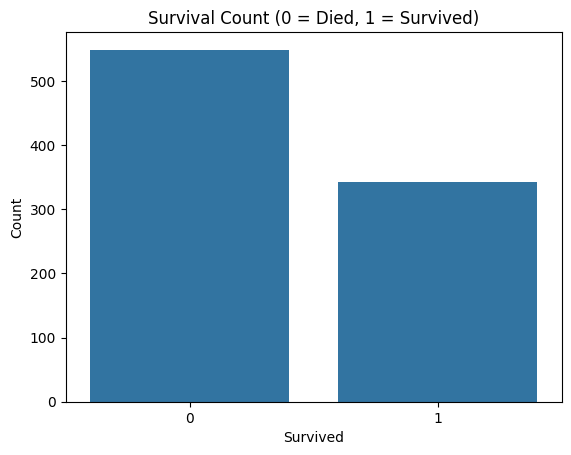

In [11]:
sns.countplot(data=df, x='Survived')
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

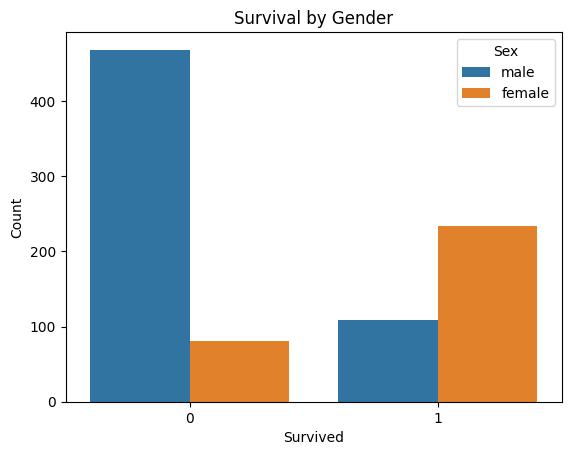

In [12]:
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

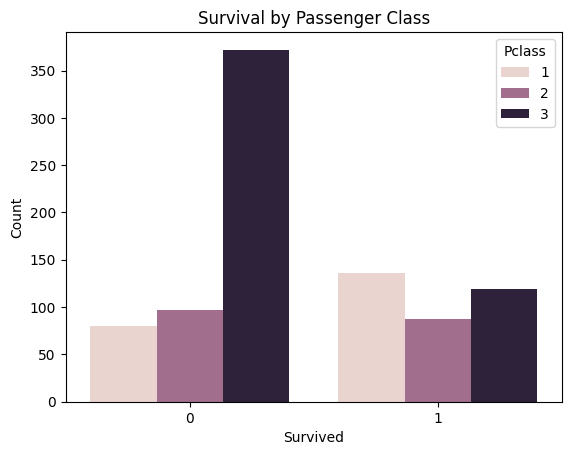

In [13]:
sns.countplot(data=df, x='Survived', hue='Pclass')
plt.title('Survival by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

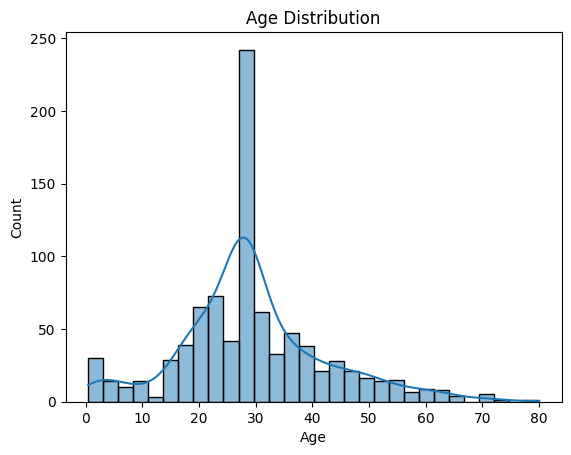

In [14]:
sns.histplot(data=df, x='Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

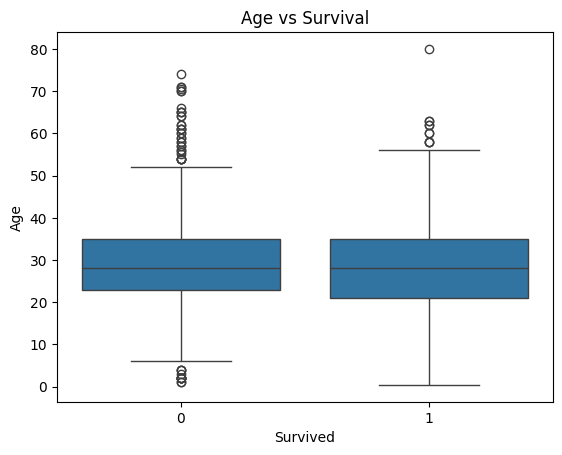

In [15]:
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age vs Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

In [16]:

df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()


Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


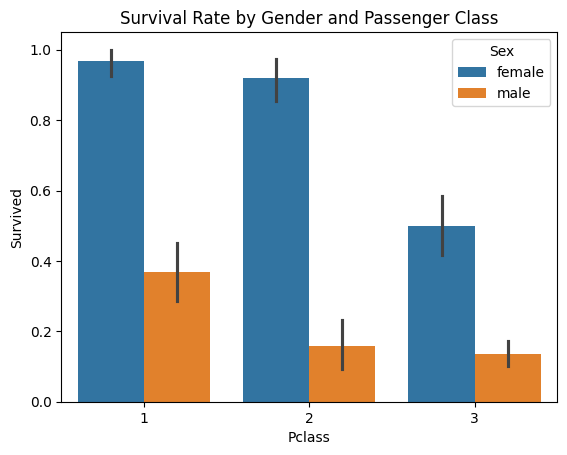

In [17]:
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rate by Gender and Passenger Class')
plt.show()


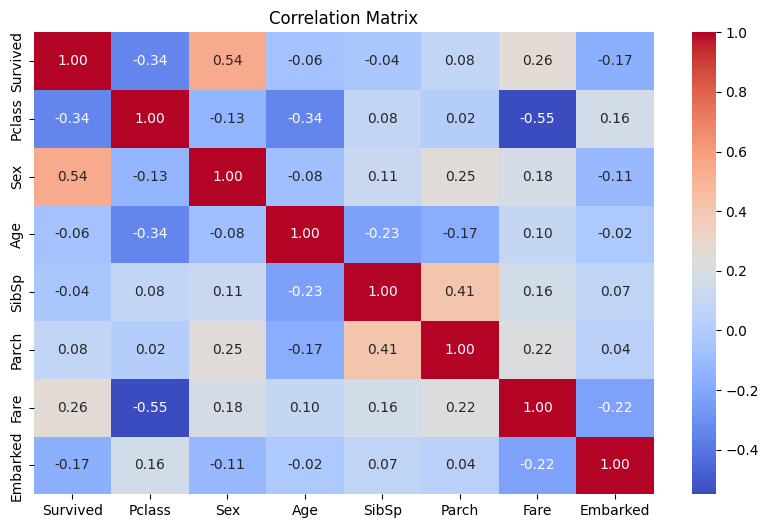

In [18]:
df_encoded = df.copy()

# Drop useless columns
df_encoded.drop(columns=['Name', 'PassengerId'], inplace=True)

# Map categorical to numeric
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
numeric_df = df_encoded.select_dtypes(include='number')
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'Fare']
target = 'Survived'

X = df_encoded[features]
y = df_encoded[target]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [22]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8044692737430168

Confusion Matrix:
 [[90 15]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



4. Feature Engineering


Combining SibSp (siblings/spouse) and Parch (parents/children).
People traveling in groups might have had higher survival chances.

In [23]:
df_encoded['FamilySize'] = df_encoded['SibSp'] + df_encoded['Parch'] + 1

Checking if someone was traveling completely alone since being alone might affect survival odds (e.g., women with kids might get priority)

In [25]:
df_encoded['IsAlone'] = (df_encoded['FamilySize'] == 1).astype(int)


Extracting title (Mr., Mrs., Miss, etc.) from the Name column. Then mapping rare titles to common ones since title gives info about social class, age group, and gender — all factors that can impact survival.

In [26]:
df_encoded['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_encoded['Title'] = df_encoded['Title'].replace(['Lady', 'Countess','Capt','Col','Don',
 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_encoded['Title'] = df_encoded['Title'].map({
    'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4
})
df_encoded['Title'] = df_encoded['Title'].fillna(4)  # fill unknown with Rare


Helps capture non-linear relationships

In [27]:
df_encoded['AgeBin'] = pd.cut(df_encoded['Age'], bins=[0, 12, 18, 35, 60, 80], labels=[0,1,2,3,4])
df_encoded['FareBin'] = pd.qcut(df_encoded['Fare'], 4, labels=[0,1,2,3])  # quartile bins


In [28]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Title']


In [30]:
# Drop columns that are no longer needed for modeling.
# Check which columns exist before dropping to avoid errors.
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']
existing_columns = [col for col in columns_to_drop if col in df_encoded.columns]
df_encoded.drop(columns=existing_columns, inplace=True)

5. Model Training

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Title']
target = 'Survived'

X = df_encoded[features]
y = df_encoded[target]

# Handle missing values (Age or Fare might have some)
X = X.fillna(X.median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7877094972067039

Confusion Matrix:
 [[87 18]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_rf_pred))
print("\nClassification Report:\n", classification_report(y_test, y_rf_pred))


Random Forest Accuracy: 0.8156424581005587

Confusion Matrix:
 [[88 17]
 [16 58]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       105
           1       0.77      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



**6.Results & Conclusion:**

Random Forest outperformed Logistic Regression:

Accuracy: 81.6%

Better precision, recall, and F1 for both classes

Feature engineering clearly improved model performance